In [3]:
from Preprocessing_M import DataExtractor, DataPreprocessing

directory = r"C:\Users\maxda\Studium\Semester6\IoT\Gebäude_Daten"
new_directory = r"C:\Users\maxda\Studium\Semester6\IoT\Gebäude_Daten"
de = DataExtractor(first_directory=directory, new_directory=new_directory)

df = de.create_df()

Read data successfully.
Data contains 979166 data points and 18 columns.


In [4]:
dp = DataPreprocessing()

df_preprocessed = dp.preprocess_df(df, rolling_window = "7d", sample_time = "1d")

In [7]:
df_preprocessed.columns

Index(['date_time', 'tmp', 'hum', 'CO2', 'VOC', 'vis', 'IR', 'BLE', 'rssi',
       'snr', 'tavg', 'tmin', 'tmax', 'prcp', 'wdir', 'wspd', 'wpgt', 'pres',
       'room_number', 'time_diff_sec', 'tmp_diff', 'hum_diff', 'CO2_diff',
       'VOC_diff', 'vis_diff', 'IR_diff', 'BLE_diff', 'CO2_diff_per_sec',
       'VOC_diff_per_sec', 'tmp_diff_per_sec', 'hum_diff_per_sec',
       'IR_diff_per_sec', 'vis_diff_per_sec', 'year', 'dayofweek', 'hour',
       'season', 'color', 'VOC_CO2_ratio'],
      dtype='object')

In [21]:
from Feature_Engineering import *
fe = FeatureEngineering(df_preprocessed, label = "CO2", categorical_features = ["room_number", "color", "season"])

In [59]:
df_train = fe.X_train
df_train["CO2"] = fe.y_train

In [100]:
df_test = fe.X_test
df_test["CO2"] = fe.y_test

In [101]:
df_train.iloc[:, 65]

date_time
2022-06-02    538.500000
2022-06-03    538.500000
2022-06-04    538.500000
2022-06-05    538.500000
2022-06-06    538.500000
                 ...    
2023-06-28    439.589578
2023-06-28    479.273107
2023-06-28    617.419709
2023-06-28    560.124293
2023-06-28    433.645297
Name: CO2, Length: 5680, dtype: float64

In [94]:
n_in=1
n_out=1
dropnan=True
n_vars = df_train.shape[1]

cols, names = list(), list()
 # input sequence (t-n, ... t-1)
for i in range(n_in, 0, -1):
    cols.append(df_train.shift(i))
    names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
 # forecast sequence (t, t+1, ... t+n)
for i in range(0, n_out):
    cols.append(df_train[["CO2"]].shift(-i))
    names += ["label"]
    # if i == 0:
    #     names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
    # else:
    #     names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    train_reframed = pd.concat(cols, axis=1)
    train_reframed.columns = names
    # drop rows with NaN values
    if dropnan:
        train_reframed.dropna(inplace=True)


In [104]:
n_in=1
n_out=1
dropnan=True
n_vars = df_test.shape[1]

cols, names = list(), list()
 # input sequence (t-n, ... t-1)
for i in range(n_in, 0, -1):
    cols.append(df_test.shift(i))
    names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
 # forecast sequence (t, t+1, ... t+n)
for i in range(0, n_out):
    cols.append(df_test[["CO2"]].shift(-i))
    names += ["label"]
    # if i == 0:
    #     names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
    # else:
    #     names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    test_reframed = pd.concat(cols, axis=1)
    test_reframed.columns = names
    # drop rows with NaN values
    if dropnan:
        test_reframed.dropna(inplace=True)


In [106]:
# split into train and test sets
values_train = train_reframed.values
values_test = test_reframed.values
# split into input and outputs
train = values_train[:, :]
test = values_test[:, :]

train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(5679, 1, 66) (5679,) (1419, 1, 66) (1419,)


In [114]:
train_X = np.asarray(train_X).astype('float32')
train_y = np.asarray(train_y).astype('float32')

test_X = np.asarray(test_X).astype('float32')
test_y = np.asarray(test_y).astype('float32')


Epoch 1/10
23/23 - 14s - loss: 394500.5000 - val_loss: 221579.4062 - 14s/epoch - 623ms/step
Epoch 2/10
23/23 - 1s - loss: 355941.4375 - val_loss: 160658.9375 - 613ms/epoch - 27ms/step
Epoch 3/10
23/23 - 1s - loss: 246858.7188 - val_loss: 60309.1484 - 588ms/epoch - 26ms/step
Epoch 4/10
23/23 - 1s - loss: 100723.3906 - val_loss: 5266.3501 - 596ms/epoch - 26ms/step
Epoch 5/10
23/23 - 1s - loss: 34151.0430 - val_loss: 33626.6992 - 607ms/epoch - 26ms/step
Epoch 6/10
23/23 - 1s - loss: 34056.2969 - val_loss: 23418.0332 - 598ms/epoch - 26ms/step
Epoch 7/10
23/23 - 1s - loss: 34138.4883 - val_loss: 22105.3262 - 594ms/epoch - 26ms/step
Epoch 8/10
23/23 - 1s - loss: 33807.4805 - val_loss: 23187.3906 - 633ms/epoch - 28ms/step
Epoch 9/10
23/23 - 1s - loss: 33816.6172 - val_loss: 23230.1543 - 595ms/epoch - 26ms/step
Epoch 10/10
23/23 - 1s - loss: 33981.3672 - val_loss: 22821.9375 - 595ms/epoch - 26ms/step


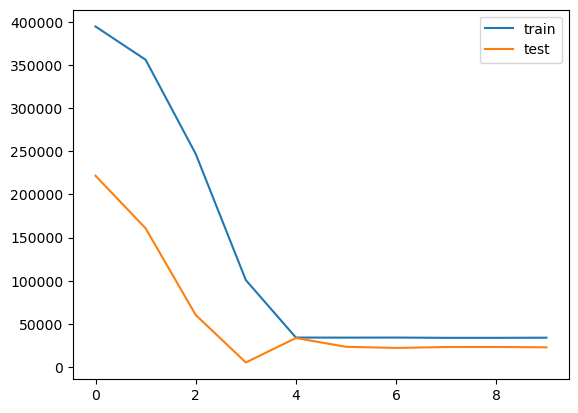

In [123]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import LSTM, Dense, GRU, Dropout, Bidirectional
from keras.optimizers import Adam, SGD
from matplotlib import pyplot

class MyLSTMModel:
    def __init__(self, lstm_units=int(fe.X_train.shape[1]*2),input_shape=(None, fe.X_train.shape[1])):
        self.model = Sequential()
        self.model.add(LSTM(units=lstm_units, input_shape=input_shape, return_sequences = True))
        self.model.add(Dropout(0.4))
        self.model.add(LSTM(units=lstm_units*2, return_sequences = True))
        self.model.add(Dropout(0.3))
        self.model.add(Dropout(0.3))
        self.model.add(Bidirectional(LSTM(units=lstm_units)))
        self.model.add(Dropout(0.3))
        self.model.add(Dense(50, activation = "relu"))
        self.model.add(Dense(30, activation = "relu"))
        self.model.add(Dense(15, activation = "relu"))

        self.model.add(Dense(1)) 

        self.model.compile(optimizer="adam", loss='mse')
    
    def summary(self):
        self.model.summary()

# Instantiate the model
my_model = MyLSTMModel()

history = my_model.model.fit(train_X, train_y, epochs=10, batch_size=256, validation_data=(test_X, test_y), verbose=2, shuffle=False)

pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

Epoch 1/100
1893/1893 - 10s - loss: 587.9341 - val_loss: 443.2758 - 10s/epoch - 5ms/step
Epoch 2/100
1893/1893 - 4s - loss: 558.1998 - val_loss: 413.8523 - 4s/epoch - 2ms/step
Epoch 3/100
1893/1893 - 4s - loss: 528.4799 - val_loss: 383.1462 - 4s/epoch - 2ms/step
Epoch 4/100
1893/1893 - 6s - loss: 497.3174 - val_loss: 352.2361 - 6s/epoch - 3ms/step
Epoch 5/100
1893/1893 - 5s - loss: 466.5123 - val_loss: 321.4771 - 5s/epoch - 3ms/step
Epoch 6/100
1893/1893 - 4s - loss: 434.5882 - val_loss: 288.5751 - 4s/epoch - 2ms/step
Epoch 7/100
1893/1893 - 5s - loss: 402.0999 - val_loss: 256.3274 - 5s/epoch - 2ms/step
Epoch 8/100
1893/1893 - 4s - loss: 369.8904 - val_loss: 224.1372 - 4s/epoch - 2ms/step
Epoch 9/100
1893/1893 - 4s - loss: 337.7328 - val_loss: 191.9915 - 4s/epoch - 2ms/step
Epoch 10/100
1893/1893 - 4s - loss: 305.2773 - val_loss: 158.3345 - 4s/epoch - 2ms/step
Epoch 11/100
1893/1893 - 4s - loss: 271.5482 - val_loss: 124.7275 - 4s/epoch - 2ms/step
Epoch 12/100
1893/1893 - 5s - loss: 238

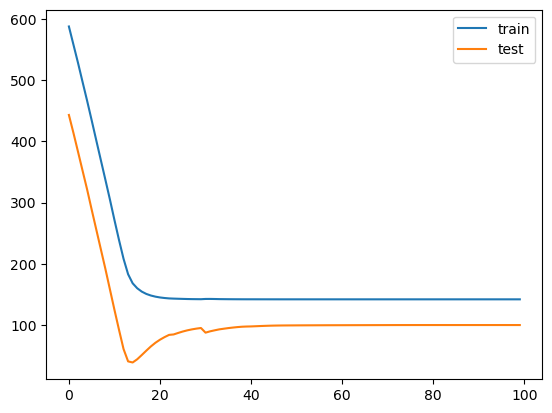

In [125]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot

# design network
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=100, batch_size=3, validation_data=(test_X, test_y), verbose=2, shuffle=False)
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [ ]:
# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
# invert scaling for forecast
inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)